#**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, f1_score
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

#**Dataset import**

In [2]:
train = "/content/train.csv"
test= '/content/test.csv'
stores= '/content/stores.csv'
features= '/content/features.csv'

In [3]:
df1=pd.read_csv(train)
df2=pd.read_csv(features)
df3=pd.read_csv(stores)
df4=pd.read_csv(test)

#**Importing dataframes**

In [4]:
df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df3.columns = df3.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')
df4.columns = df4.columns.str.lower().str.replace(' ', '_')

#**Dataframe shape**

In [5]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)

(421570, 5)
(8190, 12)
(45, 3)
(115064, 4)


#**Merging dataframes**

In [6]:
Merged_data=df1.merge(df2, how="left").merge(df3,how="left")
Merged_data.head()

,store,dept,date,weekly_sales,isholiday,temperature,fuel_price,markdown1,markdown2,markdown3,markdown4,markdown5,cpi,unemployment,type,size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


#**Data Pre-processing**

# Data Cleaning
# Droping unnecessary columns

In [7]:
Merged_data.drop(['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5'], axis=1, inplace=True)

# Handleing missing values

## Replace NaN values with 0

In [8]:
Merged_data.fillna(0, inplace=True)
Merged_data.head()

,store,dept,date,weekly_sales,isholiday,temperature,fuel_price,cpi,unemployment,type,size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,211.350143,8.106,A,151315


#displaying merged data

In [9]:
Merged_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
store,421570.0,22.200546,12.785297,1.000,11.000000,22.00000,33.000000,45.000000
dept,421570.0,44.260317,30.492054,1.000,18.000000,37.00000,74.000000,99.000000
weekly_sales,421570.0,15981.258123,22711.183519,-4988.940,2079.650000,7612.03000,20205.852500,693099.360000
temperature,421570.0,60.090059,18.447931,-2.060,46.680000,62.09000,74.280000,100.140000
fuel_price,421570.0,3.361027,0.458515,2.472,2.933000,3.45200,3.738000,4.468000
cpi,421570.0,171.201947,39.159276,126.064,132.022667,182.31878,212.416993,227.232807
unemployment,421570.0,7.960289,1.863296,3.879,6.891000,7.86600,8.572000,14.313000
size,421570.0,136727.915739,60980.583328,34875.000,93638.000000,140167.00000,202505.000000,219622.000000


In [10]:
Merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   store         421570 non-null  int64  
 1   dept          421570 non-null  int64  
 2   date          421570 non-null  object 
 3   weekly_sales  421570 non-null  float64
 4   isholiday     421570 non-null  bool   
 5   temperature   421570 non-null  float64
 6   fuel_price    421570 non-null  float64
 7   cpi           421570 non-null  float64
 8   unemployment  421570 non-null  float64
 9   type          421570 non-null  object 
 10  size          421570 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.8+ MB


#**Set order by Date**

In [11]:
Merged_data=Merged_data.sort_values(by='date')

#**Number of Walmart stores display**

In [12]:
sizes=Merged_data['type'].value_counts()
print(sizes)

A    215478
B    163495
C     42597
Name: type, dtype: int64


# Distribution of Sales by different Store

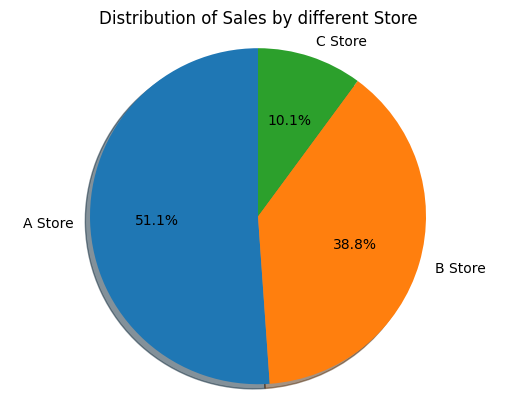

In [13]:
labels='A Store','B Store','C Store'
fig1,ax1=plt.subplots()
ax1.pie(sizes,labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Distribution of Sales by different Store')
plt.show()

#**Histogram**

# Distribution of Store Data

<ipython-input-14-85ead4450ca4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Merged_data['store'],color='m')


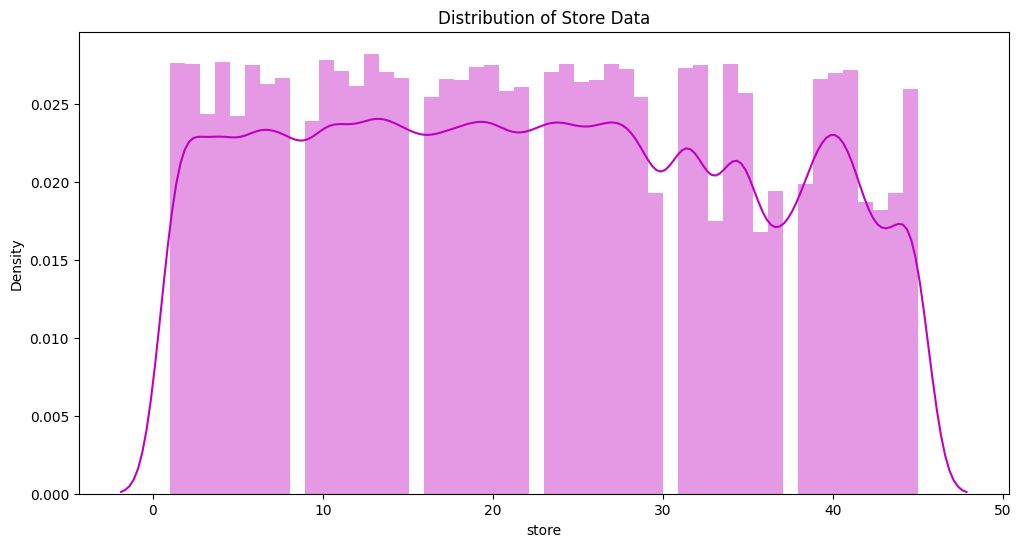

In [14]:
plt.figure(figsize=(12,6))
sns.distplot(Merged_data['store'],color='m')
plt.title('Distribution of Store Data')
plt.show()

# Distribution of Weekly Sales

<ipython-input-15-8f7dfa7d655e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Merged_data['weekly_sales'],color='b')


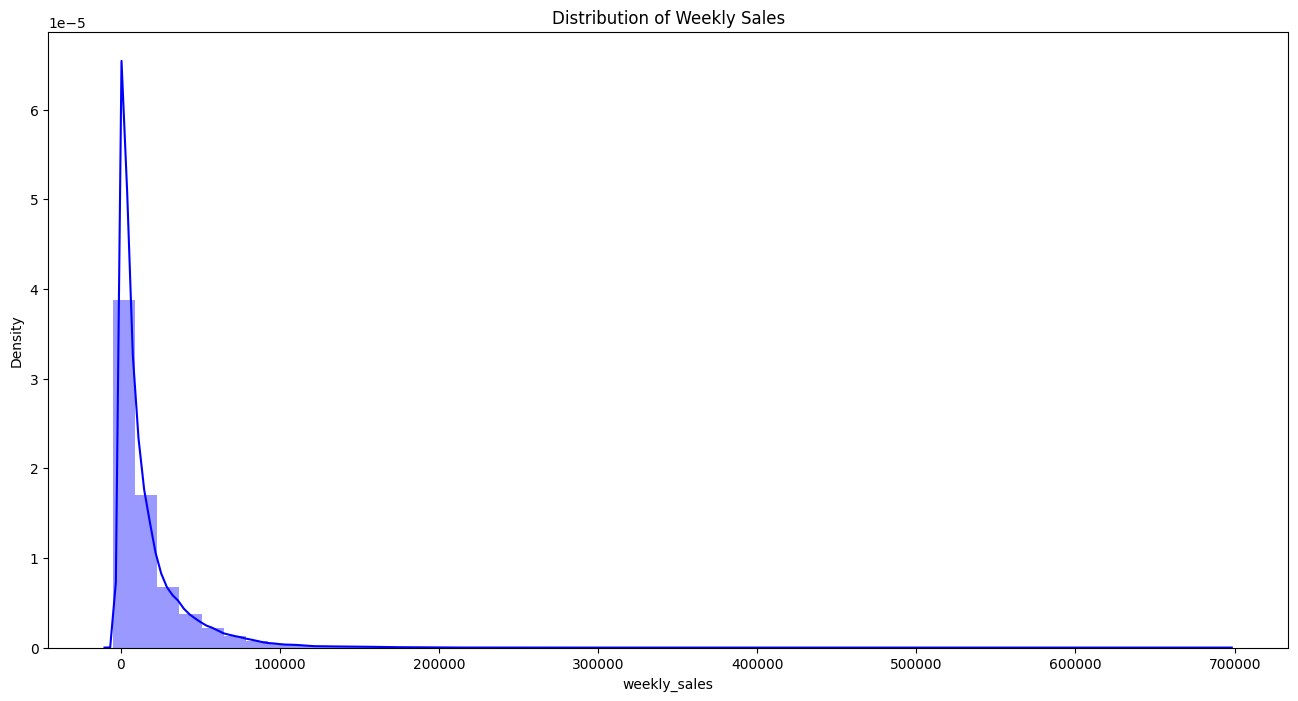

In [15]:
plt.figure(figsize=(16,8))
sns.distplot(Merged_data['weekly_sales'],color='b')
plt.title('Distribution of Weekly Sales')
plt.show()

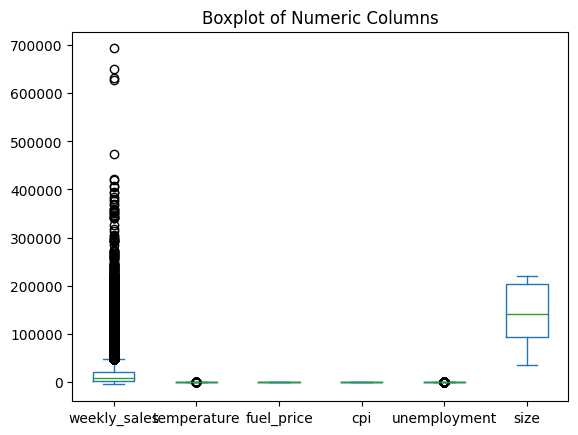

In [16]:
# Droping rows with missing values in numeric columns
numeric_columns = ['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment', 'size']
Merged_data_numeric = Merged_data.dropna(subset=numeric_columns)

numeric_data = Merged_data_numeric[numeric_columns]
numeric_data.plot(kind='box')
plt.title('Boxplot of Numeric Columns')
plt.show()


# Data distribution

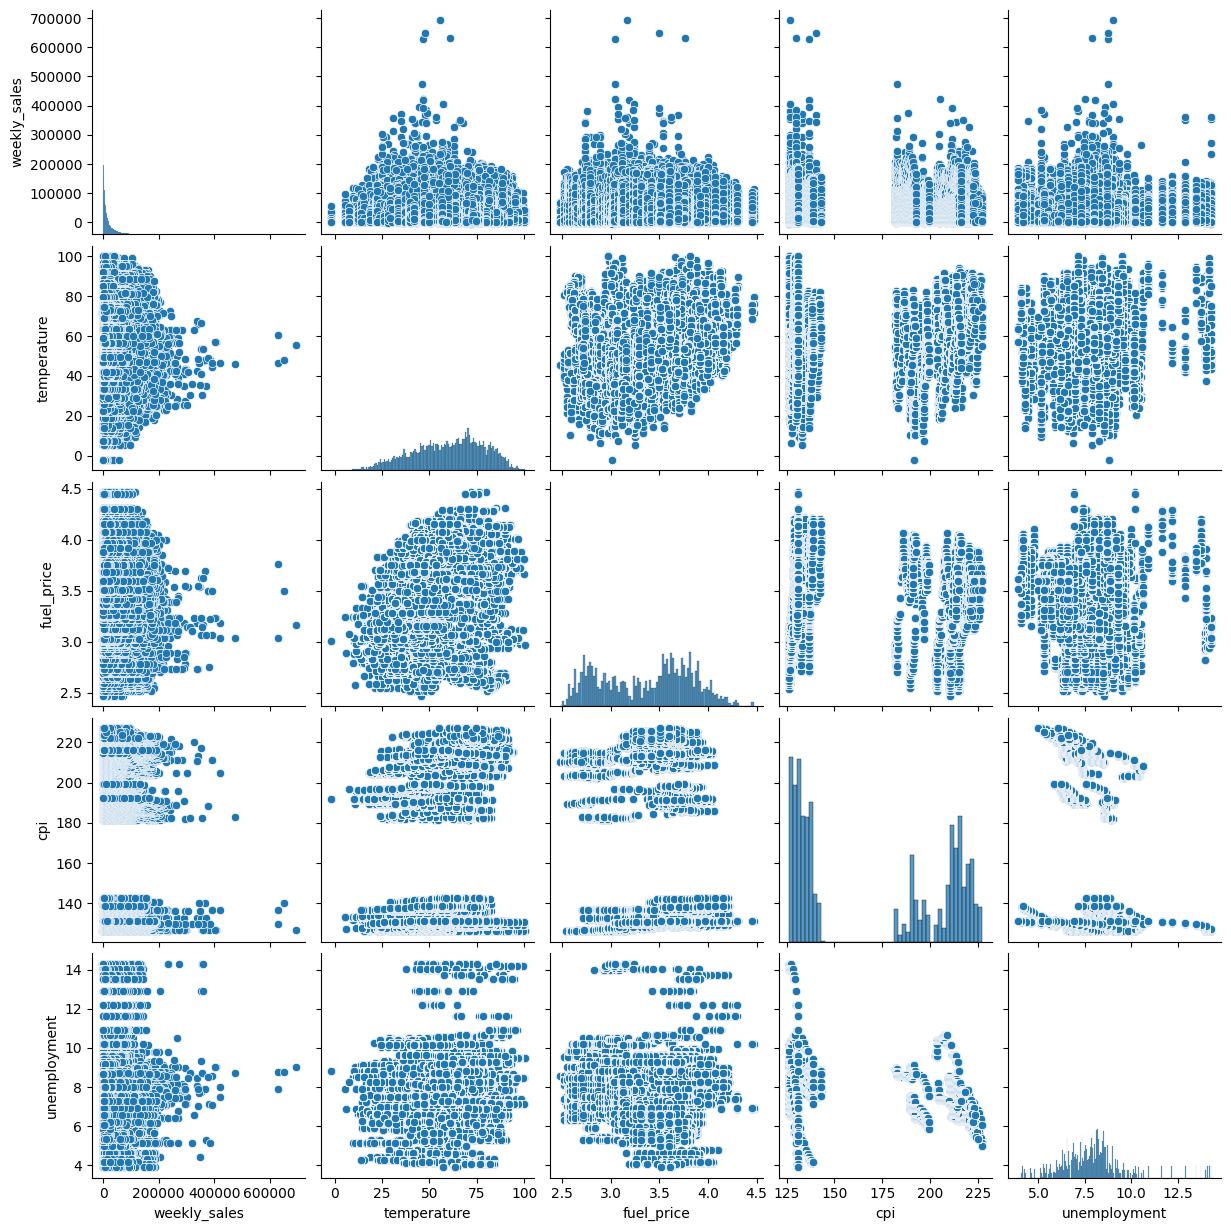

In [17]:
sns.pairplot(Merged_data[['weekly_sales', 'temperature', 'fuel_price', 'cpi', 'unemployment']])
plt.show()

# Correlation Analysis

<ipython-input-18-787c77ebaec9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = Merged_data.corr()


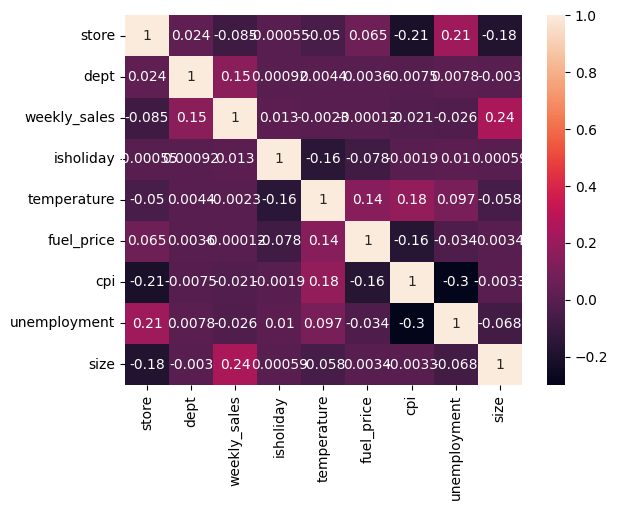

In [18]:
correlation_matrix = Merged_data.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

# Feature Extraction

In [19]:
X = Merged_data.drop('weekly_sales', axis=1)
y = Merged_data['weekly_sales']

#**Weekly sales on different stores**

# Average Weekly Sales by Store Type and Year

<ipython-input-20-e890455aa57d>:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


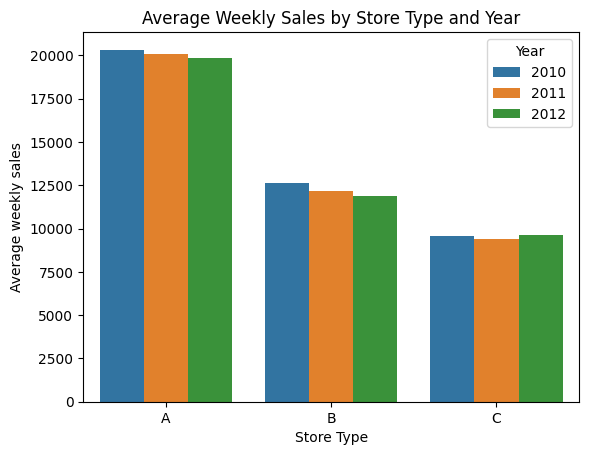

In [20]:
Merged_data['date'] = pd.to_datetime(Merged_data['date'])
salesbytype_dataset = Merged_data.groupby(['date', 'type']).mean().reset_index()
salesbytype_dataset['Year'] = salesbytype_dataset['date'].dt.year
salesbytype_dataset['Month'] = salesbytype_dataset['date'].dt.month
salesbytype_dataset['Week'] = salesbytype_dataset['date'].dt.isocalendar().week

sns.barplot(
    data=salesbytype_dataset, x="type", y="weekly_sales",
    hue="Year", ci=None
).set(xlabel='Store Type', ylabel='Average weekly sales')
plt.title('Average Weekly Sales by Store Type and Year')
plt.show()

#**Weekly sales based on  fuel prices in different region of Walmart stores**

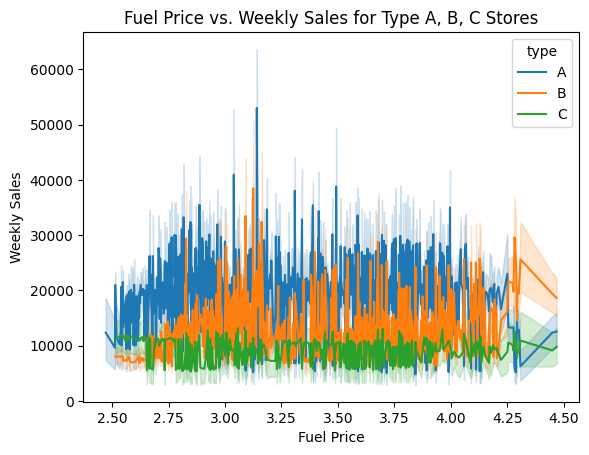

In [21]:
filtered_data = Merged_data[Merged_data['type'].isin(['A', 'B', 'C'])]

sns.lineplot(data=filtered_data, x='fuel_price', y='weekly_sales', hue='type')

plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Fuel Price vs. Weekly Sales for Type A, B, C Stores')

plt.show()

#**Rate of CPI in different Walmart stores**

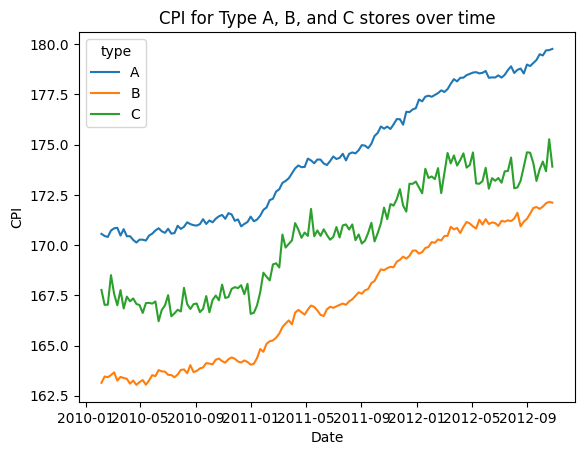

In [22]:
# Filter data for Type A, B, and C stores
type_ABC_data = Merged_data[Merged_data['type'].isin(['A', 'B', 'C'])]

cpi_by_type = type_ABC_data.groupby(['date', 'type'])['cpi'].mean().reset_index()

# Ploting line graph
sns.lineplot(data=cpi_by_type, x='date', y='cpi', hue='type')
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI for Type A, B, and C stores over time')
plt.show()

#**Weekly sales based on CPI**

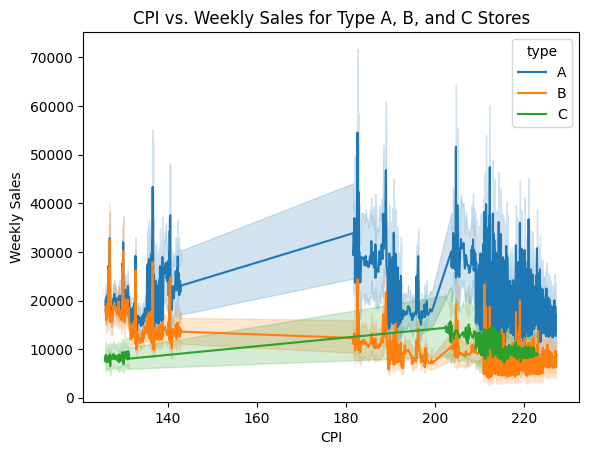

In [23]:
type_stores = ['A', 'B', 'C']
filtered_data = Merged_data[Merged_data['type'].isin(type_stores)]

sns.lineplot(data=filtered_data, x='cpi', y='weekly_sales', hue='type')

plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('CPI vs. Weekly Sales for Type A, B, and C Stores')
plt.show()

#**Rate of Unemployment in different regions**

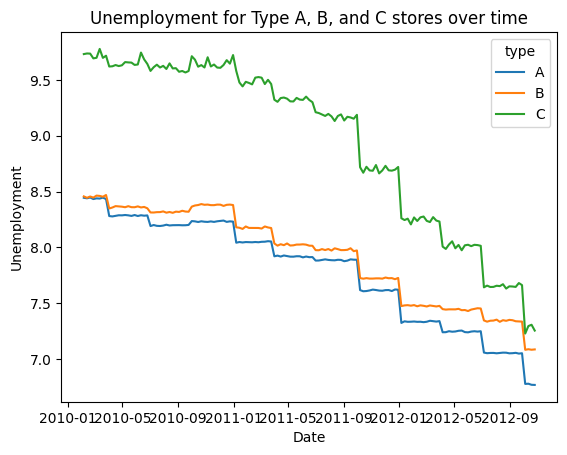

In [24]:
type_ABC_data = Merged_data[Merged_data['type'].isin(['A', 'B', 'C'])]

cpi_by_type = type_ABC_data.groupby(['date', 'type'])['unemployment'].mean().reset_index()

sns.lineplot(data=cpi_by_type, x='date', y='unemployment', hue='type')
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.title('Unemployment for Type A, B, and C stores over time')
plt.show()

#**Weekly sales based on rate of unemployment in different regions of Walmart stores**

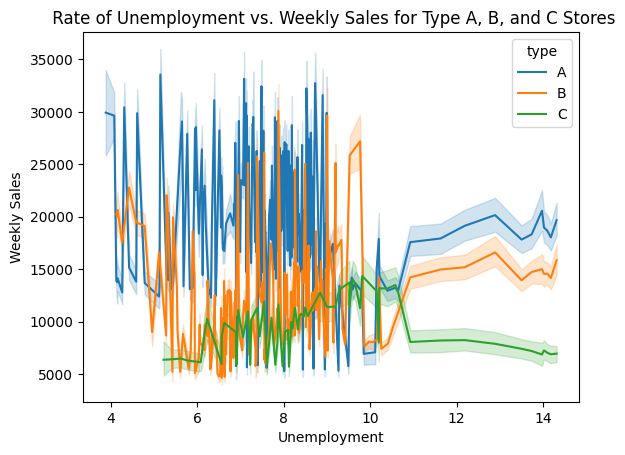

In [25]:
type_stores = ['A', 'B', 'C']
filtered_data = Merged_data[Merged_data['type'].isin(type_stores)]

sns.lineplot(data=filtered_data, x='unemployment', y='weekly_sales', hue='type')

plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title(' Rate of Unemployment vs. Weekly Sales for Type A, B, and C Stores')
plt.show()

#**Frequency of temperature on different region of Walmart stores**

<ipython-input-26-fea8c51f3c24>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salesbytemp_dataset = Merged_data.groupby(['temperature','type']).mean().reset_index()
<ipython-input-26-fea8c51f3c24>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesbytemp_dataset['Smoothed'][salesbytemp_datasetB.index] = salesbytemp_datasetB['Smoothed']
<ipython-input-26-fea8c51f3c24>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salesb

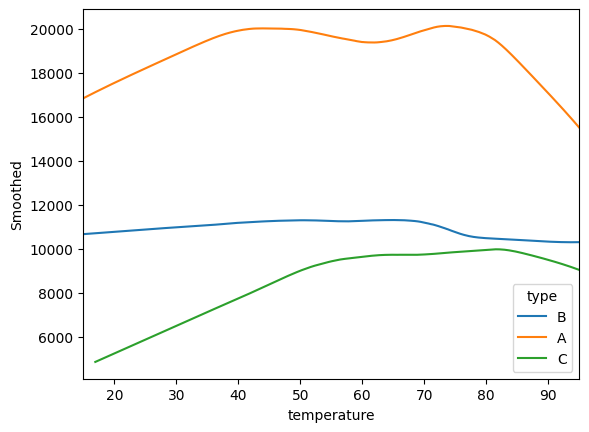

In [26]:
import statsmodels.api as sm
salesbytemp_dataset = Merged_data.groupby(['temperature','type']).mean().reset_index()

salesbytemp_datasetA = salesbytemp_dataset[salesbytemp_dataset['type'] == 'A'][['temperature','weekly_sales']]
smoothed = sm.nonparametric.lowess(exog=salesbytemp_datasetA['temperature'], endog=salesbytemp_datasetA['weekly_sales'], frac=0.5)
salesbytemp_datasetA['Smoothed'] = smoothed[:, 1]
salesbytemp_dataset = pd.merge(salesbytemp_dataset,salesbytemp_datasetA,how='left')

salesbytemp_datasetB = salesbytemp_dataset[salesbytemp_dataset['type'] == 'B'][['temperature','weekly_sales']]
smoothed = sm.nonparametric.lowess(exog=salesbytemp_datasetB['temperature'], endog=salesbytemp_datasetB['weekly_sales'], frac=0.5)
salesbytemp_datasetB['Smoothed'] = smoothed[:, 1]
salesbytemp_datasetB.head()
salesbytemp_dataset['Smoothed'][salesbytemp_datasetB.index] = salesbytemp_datasetB['Smoothed']

salesbytemp_datasetC = salesbytemp_dataset[salesbytemp_dataset['type'] == 'C'][['temperature','weekly_sales']]
smoothed = sm.nonparametric.lowess(exog=salesbytemp_datasetC['temperature'], endog=salesbytemp_datasetC['weekly_sales'], frac=0.5)
salesbytemp_datasetC['Smoothed'] = smoothed[:, 1]
salesbytemp_datasetC.head()
salesbytemp_dataset['Smoothed'][salesbytemp_datasetC.index] = salesbytemp_datasetC['Smoothed']

sns.lineplot(data=salesbytemp_dataset, x='temperature', y='Smoothed', hue='type').set(xlim=(15, 95))

plt.show()

#**Weekly sales based on temperature in different stores location**

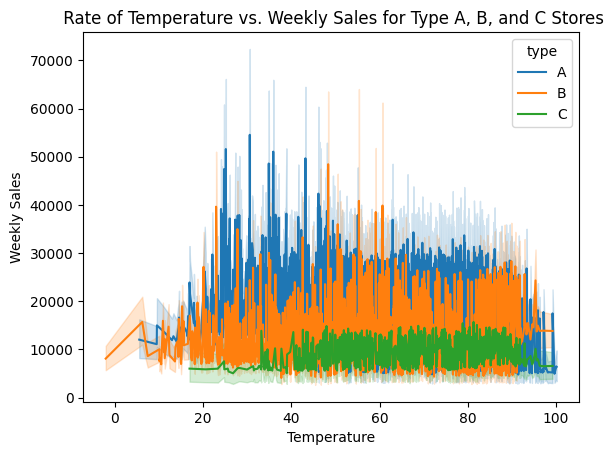

In [27]:
type_stores = ['A', 'B', 'C']
filtered_data = Merged_data[Merged_data['type'].isin(type_stores)]

sns.lineplot(data=filtered_data, x='temperature', y='weekly_sales', hue='type')

plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title(' Rate of Temperature vs. Weekly Sales for Type A, B, and C Stores')
plt.show()

# **Machine Learning model**

## Defining features and target variable

In [28]:
# Defining features and target variable
Merged_data.drop('date', axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder ()
Merged_data['type']  = label_encoder.fit_transform (Merged_data['type'])

X = Merged_data.drop('weekly_sales', axis=1)
y = Merged_data['weekly_sales']

Merged_data.head()

,store,dept,weekly_sales,isholiday,temperature,fuel_price,cpi,unemployment,type,size
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,0,151315
277665,29,5,15552.08,False,24.36,2.788,131.527903,10.064,1,93638
277808,29,6,3200.22,False,24.36,2.788,131.527903,10.064,1,93638
277951,29,7,10820.05,False,24.36,2.788,131.527903,10.064,1,93638
278094,29,8,20055.64,False,24.36,2.788,131.527903,10.064,1,93638


# Spliting the dataset into training and testing sets

In [29]:
# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardize the features

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Decision Tree**

### Initialize and train the Decision Tree

In [31]:
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [32]:
# Making predictions
y_pred_dt = decision_tree_regressor.predict(X_test_scaled)

# Calculating metrics
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
accuracy_dt = decision_tree_regressor.score(X_test_scaled, y_test)

print("Decision Tree Metrics:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("Root Mean Squared Error:", rmse_dt)
print("Accuracy:", accuracy_dt)


Decision Tree Metrics:
Mean Squared Error: 49924334.31591862
Mean Absolute Error: 2394.788416514458
Root Mean Squared Error: 7065.715414302972
Accuracy: 0.9039918051667387


# **Random Forest**

## Initializing and train the Random Forest

In [33]:
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [34]:
# Making predictions
y_pred_rf = random_forest_regressor.predict(X_test_scaled)

# Calculating metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = mean_squared_error(y_test, y_pred_dt, squared=False)
accuracy_rf = random_forest_regressor.score(X_test_scaled, y_test)

print("Random Forest Metrics:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("Root Mean Squared Error:", rmse_dt)
print("Accuracy:", accuracy_dt)


Random Forest Metrics:
Mean Squared Error: 49924334.31591862
Mean Absolute Error: 2394.788416514458
Root Mean Squared Error: 7065.715414302972
Accuracy: 0.9039918051667387


# **Linear regression**

## Initializing and train the Linear regression

In [35]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [36]:
# Making predictions
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Calculating metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_lr = linear_regressor.score(X_test_scaled, y_test)

print("Linear Regression Metrics:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("Root Mean Squared Error:", rmse_lr)
print("Accuracy score:", r2_lr)


Linear Regression Metrics:
Mean Squared Error: 474547323.5497762
Mean Absolute Error: 14620.895288485204
Root Mean Squared Error: 21784.10713225989
Accuracy score: 0.08741032762368883


The model accuracy scores are significantly lows, as a result the dataset needs to be pre-processed again to improve the models accuracy.

Removing outliers

In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
train = "/content/train.csv"
test= '/content/test.csv'
stores= '/content/stores.csv'
features= '/content/features.csv'

df1=pd.read_csv(train)
df2=pd.read_csv(features)
df3=pd.read_csv(stores)
df4=pd.read_csv(test)

df1.columns = df1.columns.str.lower().str.replace(' ', '_')
df3.columns = df3.columns.str.lower().str.replace(' ', '_')
df2.columns = df2.columns.str.lower().str.replace(' ', '_')
df4.columns = df4.columns.str.lower().str.replace(' ', '_')

Merged_data=df1.merge(df2, how="left").merge(df3,how="left")
Merged_data.head()

# Converting the 'Date' column to a datetime object with the correct format 'yyyy-mm-dd'
Merged_data['date'] = pd.to_datetime(Merged_data['date'], format='%Y-%m-%d')
# Extracting year, month, and day from date
Merged_data['Year'] = Merged_data['date'].dt.year
Merged_data['Month'] = Merged_data['date'].dt.month
Merged_data['Day'] = Merged_data['date'].dt.day

# Dropping the 'Date' column
Merged_data.drop('date', axis=1, inplace=True)

#Droping unnecessary columns
Merged_data.drop(['markdown1', 'markdown2', 'markdown3', 'markdown4', 'markdown5'], axis=1, inplace=True)
#Replace NaN values with 0
Merged_data.fillna(0, inplace=True)
Merged_data.head()

# Splitting data into features (X) and target (y)
X = Merged_data.drop('weekly_sales', axis=1)
y = Merged_data['weekly_sales']

# converting categorical columns for one-hot encoding
categorical_cols = ['type']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
Merged_data.head()

,store,dept,weekly_sales,isholiday,temperature,fuel_price,cpi,unemployment,type,size,Year,Month,Day
0,1,1,24924.50,False,42.31,2.572,211.096358,8.106,A,151315,2010,2,5
1,1,1,46039.49,True,38.51,2.548,211.242170,8.106,A,151315,2010,2,12
2,1,1,41595.55,False,39.93,2.514,211.289143,8.106,A,151315,2010,2,19
3,1,1,19403.54,False,46.63,2.561,211.319643,8.106,A,151315,2010,2,26
4,1,1,21827.90,False,46.50,2.625,211.350143,8.106,A,151315,2010,3,5


Improved model performance

In [43]:
# Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor(random_state=42)
decision_tree_regressor.fit(X_train_scaled, y_train)

# Making predictions with Decision Tree
y_pred_dt = decision_tree_regressor.predict(X_test_scaled)

# Calculating metrics for Decision Tree
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Metrics:")
print("Mean Squared Error:", mse_dt)
print("Mean Absolute Error:", mae_dt)
print("Root Mean Squared Error:", rmse_dt)
print("R-squared:", r2_dt)

# Random Forest Regressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train_scaled, y_train)

# Making predictions with Random Forest
y_pred_rf = random_forest_regressor.predict(X_test_scaled)

# Calculating metrics for Random Forest
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Metrics:")
print("Mean Squared Error:", mse_rf)
print("Mean Absolute Error:", mae_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)

# Linear Regression
linear_regressor = LinearRegression()
linear_regressor.fit(X_train_scaled, y_train)

# Making predictions with Linear Regression
y_pred_lr = linear_regressor.predict(X_test_scaled)

# Calculating metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Metrics:")
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)


Decision Tree Metrics:
Mean Squared Error: 20380925.26957373
Mean Absolute Error: 1799.9467604431054
Root Mean Squared Error: 4514.523814265878
R-squared: 0.9609164736908936

Random Forest Metrics:
Mean Squared Error: 12343012.643427946
Mean Absolute Error: 1373.3251655359727
Root Mean Squared Error: 3513.2623931935323
R-squared: 0.9763303945722608

Linear Regression Metrics:
Mean Squared Error: 473835063.12530005
Mean Absolute Error: 14570.355937859296
Root Mean Squared Error: 21767.752826722837
R-squared: 0.09134914578772335


# Model Comparison

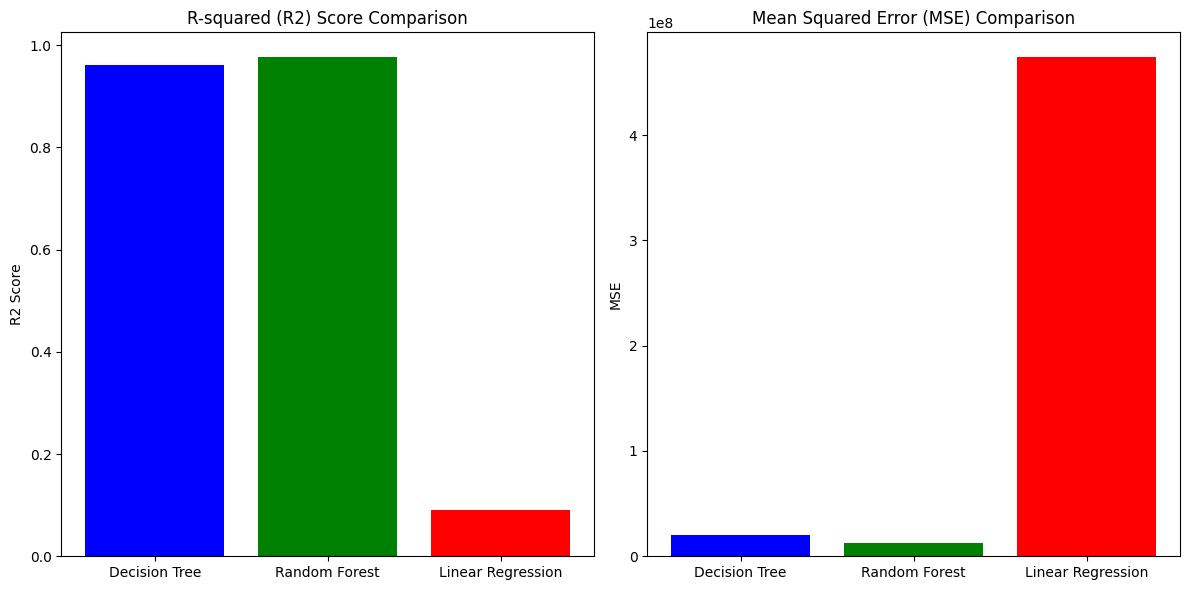

In [44]:
model_names = ['Decision Tree', 'Random Forest', 'Linear Regression']
r2_scores = [r2_dt, r2_rf, r2_lr]
mse_values = [mse_dt, mse_rf, mse_lr]
plt.figure(figsize=(12, 6))

#  R2 score
plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color=['blue', 'green', 'red'])
plt.title('R-squared (R2) Score Comparison')
plt.ylabel('R2 Score')

#  MSE
plt.subplot(1, 2, 2)
plt.bar(model_names, mse_values, color=['blue', 'green', 'red'])
plt.title('Mean Squared Error (MSE) Comparison')
plt.ylabel('MSE')
plt.tight_layout()
plt.show()